In [41]:
TRAIN_PATH = "Code_Test/Train"
VAL_PATH = "Code_Test/Val"



In [42]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [43]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

opt=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [45]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [46]:
train_generator = train_datagen.flow_from_directory(
    'Code_Test/Train',
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'binary')


Found 920 images belonging to 2 classes.


In [47]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [48]:
validation_generator = test_dataset.flow_from_directory(
    'Code_Test/Val',
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'binary')

Found 232 images belonging to 2 classes.


In [49]:
results = model.fit_generator(
    train_generator,
    steps_per_epoch=1,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps=1
)

<ipython-input-49-c827c8341c56>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(


Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 0.7239 - accuracy: 0.4531 - val_loss: 0.7252 - val_accuracy: 0.4219
Epoch 2/50
1/1 [==============================] - 12s 12s/step - loss: 0.9174 - accuracy: 0.4844 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 13s 13s/step - loss: 0.6998 - accuracy: 0.4062 - val_loss: 0.6928 - val_accuracy: 0.4844
Epoch 4/50
1/1 [==============================] - 12s 12s/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5469
Epoch 5/50
1/1 [==============================] - 12s 12s/step - loss: 0.6840 - accuracy: 0.6094 - val_loss: 0.6945 - val_accuracy: 0.4375
Epoch 6/50
1/1 [==============================] - 13s 13s/step - loss: 0.7076 - accuracy: 0.4219 - val_loss: 0.6936 - val_accuracy: 0.4688
Epoch 7/50
1/1 [==============================] - 13s 13s/step - loss: 0.6937 - accuracy: 0.4375 - val_loss: 0.6911 - val_accuracy: 0.5625
Epoch 8/50
1/1 [===========

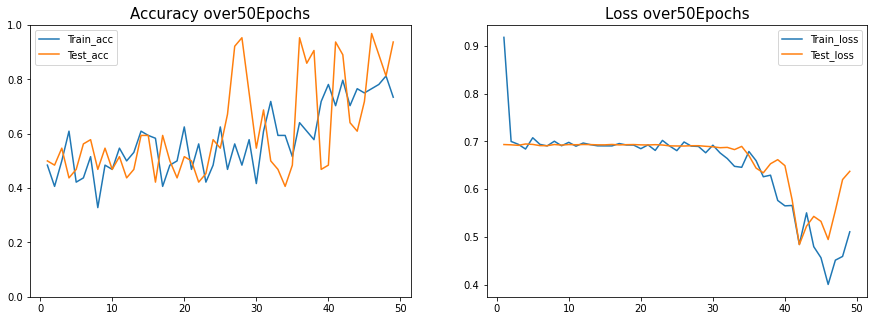

In [51]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc',scaley=False)
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc',scaley=False)
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
 plt.legend()
 plt.show()
 
plot_acc_loss(results, 50)

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('Code_Test/single_prediction/covid.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(train_generator.class_indices)

{'Covid': 0, 'Normal': 1}


Populating the interactive namespace from numpy and matplotlib


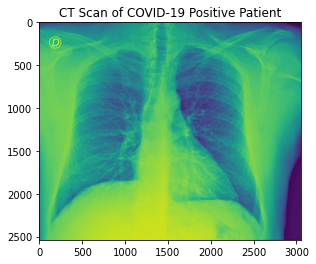

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('Code_Test/single_prediction/covid.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('CT Scan of COVID-19 Positive Patient')


In [ ]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: covid


Populating the interactive namespace from numpy and matplotlib


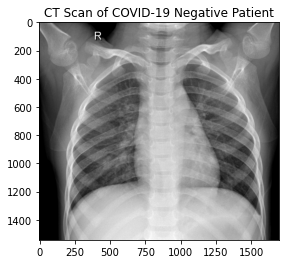

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('Code_Test/single_prediction/normal.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

img=mpimg.imread('Code_Test/single_prediction/normal.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('CT Scan of COVID-19 Negative Patient')

In [ ]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: normal
